In [1]:
import math

import numpy as np
import scipy.stats as st
import awkward as ak

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl
from matplotlib import cm
import vector


from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

from pocket_coffea.lib.deltaR_matching import object_matching


ModuleNotFoundError: No module named 'coffea'

In [ ]:
# old debug of parton jet matching
NanoAODSchema.warn_missing_crossrefs = False

fname = "/afs/cern.ch/user/a/adpetre/19922B78-283B-CD48-8A3D-0308D48A824A.root"
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema, entry_stop=50000).events()


In [3]:
isOutgoing = events.LHEPart.status == 1

quarks = events.LHEPart[isOutgoing & (events.LHEPart.pdgId!=25)]
        
# # Select b-quarks at Gen level, coming from H->bb decay
higgs = events.GenPart[(events.GenPart.pdgId == 25) & (events.GenPart.hasFlags(['fromHardProcess']))]
higgs =  higgs[ak.num(higgs.childrenIdxG, axis=2) == 2]
higgs_partons = ak.with_field(ak.flatten(higgs.children, axis=2), 25, "from_part") # assign 25 to the higgs decay products as an index (from_part)
quarks = ak.with_name(ak.concatenate( (quarks, higgs_partons) , axis=1) , name='PtEtaPhiMCandidate')


idx = 100
top = events.GenPart[(events.GenPart.pdgId == 6) & (events.GenPart.hasFlags(['fromHardProcess']))]
print(top[idx][0].to_list())
print(top[idx][1].to_list())
print(ak.num(top, axis=1))
print(ak.max(ak.num(top, axis=1)))
print(ak.min(ak.num(top, axis=1)))
print(ak.num(top.childrenIdxG, axis=2))
print(ak.max(ak.num(top.childrenIdxG, axis=2), axis=0))
print(ak.min(ak.num(top.childrenIdxG, axis=2), axis=0))
print()
#print(top[0][1].children.to_list())
top =  top[ak.num(top.childrenIdxG, axis=2) == 3]
top_partons = ak.with_field(ak.flatten(top.children, axis=2), 100, "from_part") # assign 25 to the higgs decay products as an index (from_part)

antitop = events.GenPart[(events.GenPart.pdgId == -6) & (events.GenPart.hasFlags(['fromHardProcess']))]
print(antitop[idx][0].to_list())
print(antitop[idx][1].to_list())
print(ak.num(antitop, axis=1))
print(ak.max(ak.num(antitop, axis=1)))
print(ak.min(ak.num(antitop, axis=1)))
print(ak.num(antitop.childrenIdxG, axis=2))
print(ak.max(ak.num(antitop.childrenIdxG, axis=2), axis=0))
print(ak.min(ak.num(antitop.childrenIdxG, axis=2), axis=0))
print()


# Sort b-quarks by pt
#quarks = ak.with_name(quarks[ak.argsort(quarks.pt, ascending=False)], name='PtEtaPhiMCandidate')

#semilep = ak.sum((abs(quarks.pdgId) > 10)&(quarks.pdgId < 21), axis=1)

#semilep_partons = quarks[semilep==2]
#events = events[semilep==2]

# # Calling our general object_matching function.
# # The output is an awkward array with the shape of the second argument and None where there is no matching.
# # So, calling like this, we will get out an array of matched_quarks with the dimension of the JetGood. 
# matched_quarks, matched_jets, deltaR_matched = object_matching(quarks, self.events.JetGood, dr_min=self.dr_min)

{'eta': -0.6796875, 'mass': 172.0, 'phi': 0.51953125, 'pt': 61.875, 'genPartIdxMother': 0, 'pdgId': 6, 'status': 22, 'statusFlags': 20865, 'genPartIdxMotherG': 7645, 'distinctParentIdxG': 7645, 'childrenIdxG': [7654, 7656], 'distinctChildrenIdxG': [7656], 'distinctChildrenDeepIdxG': [7656, 7657, 7658]}
{'eta': -0.65234375, 'mass': 171.7569580078125, 'phi': 0.572265625, 'pt': 62.25, 'genPartIdxMother': 3, 'pdgId': 6, 'status': 62, 'statusFlags': 10497, 'genPartIdxMotherG': 7648, 'distinctParentIdxG': 7645, 'childrenIdxG': [7657, 7658], 'distinctChildrenIdxG': [7657, 7658, 7659, 7675], 'distinctChildrenDeepIdxG': []}
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
4
2
[[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], ... [2, 2], [3, 2], [1, 2], [1, 2], [1, 2]]
[16, 14, 2, 2]
[1, 1, 2, 2]

{'eta': -0.100830078125, 'mass': 172.5, 'phi': -2.75, 'pt': 119.5, 'genPartIdxMother': 0, 'pdgId': -6, 'status': 22, 'statusFlags': 4481, 'genPartIdxMotherG': 7645, 'distinc

In [88]:
# old debug of parton jet matching
NanoAODSchema.warn_missing_crossrefs = False

fname = "/afs/cern.ch/user/a/adpetre/public/nanoAOD_step_117.root"
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema, entry_stop=50000).events()


In [98]:
isOutgoing = events.LHEPart.status == 1

quarks = events.LHEPart[isOutgoing & (events.LHEPart.pdgId!=25)]
        
# # Select b-quarks at Gen level, coming from H->bb decay
higgs = events.GenPart[(events.GenPart.pdgId == 25) & (events.GenPart.hasFlags(['fromHardProcess']))]
higgs =  higgs[ak.num(higgs.childrenIdxG, axis=2) == 2]
higgs_partons = ak.with_field(ak.flatten(higgs.children, axis=2), 25, "from_part") # assign 25 to the higgs decay products as an index (from_part)
quarks = ak.with_name(ak.concatenate( (quarks, higgs_partons) , axis=1) , name='PtEtaPhiMCandidate')


idx = 100
top = events.GenPart[(events.GenPart.pdgId == 6) & (events.GenPart.hasFlags(['fromHardProcess']))]
print(top[idx][0].to_list())
print(top[idx][1].to_list())
print(ak.num(top, axis=1))
print(ak.max(ak.num(top, axis=1)))
print(ak.min(ak.num(top, axis=1)))
print(ak.num(top.childrenIdxG, axis=2))
print(ak.max(ak.num(top.childrenIdxG, axis=2), axis=0))
print(ak.min(ak.num(top.childrenIdxG, axis=2), axis=0))
print()
#print(top[0][1].children.to_list())
top =  top[ak.num(top.childrenIdxG, axis=2) == 3]
top_partons = ak.with_field(ak.flatten(top.children, axis=2), 100, "from_part") # assign 25 to the higgs decay products as an index (from_part)

antitop = events.GenPart[(events.GenPart.pdgId == -6) & (events.GenPart.hasFlags(['fromHardProcess']))]
print(antitop[idx][0].to_list())
print(antitop[idx][1].to_list())
print(ak.num(antitop, axis=1))
print(ak.max(ak.num(antitop, axis=1)))
print(ak.min(ak.num(antitop, axis=1)))
print(ak.num(antitop.childrenIdxG, axis=2))
print(ak.max(ak.num(antitop.childrenIdxG, axis=2), axis=0))
print(ak.min(ak.num(antitop.childrenIdxG, axis=2), axis=0))
print()


# Sort b-quarks by pt
#quarks = ak.with_name(quarks[ak.argsort(quarks.pt, ascending=False)], name='PtEtaPhiMCandidate')

#semilep = ak.sum((abs(quarks.pdgId) > 10)&(quarks.pdgId < 21), axis=1)

#semilep_partons = quarks[semilep==2]
#events = events[semilep==2]

# # Calling our general object_matching function.
# # The output is an awkward array with the shape of the second argument and None where there is no matching.
# # So, calling like this, we will get out an array of matched_quarks with the dimension of the JetGood. 
# matched_quarks, matched_jets, deltaR_matched = object_matching(quarks, self.events.JetGood, dr_min=self.dr_min)

{'eta': -1.07421875, 'mass': 172.5, 'phi': 1.265625, 'pt': 144.5, 'genPartIdxMother': 0, 'pdgId': 6, 'status': 22, 'statusFlags': 4481, 'genPartIdxMotherG': 7522, 'distinctParentIdxG': 7522, 'childrenIdxG': [7534], 'distinctChildrenIdxG': [], 'distinctChildrenDeepIdxG': [7537, 7538]}
{'eta': -1.0, 'mass': 172.5821533203125, 'phi': 1.16796875, 'pt': 153.5, 'genPartIdxMother': 2, 'pdgId': 6, 'status': 62, 'statusFlags': 10497, 'genPartIdxMotherG': 7524, 'distinctParentIdxG': 7522, 'childrenIdxG': [7537, 7538], 'distinctChildrenIdxG': [7537, 7538, 7539, 7554], 'distinctChildrenDeepIdxG': []}
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3
2
[[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], ... [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
[11, 7, 2]
[1, 2, 2]

{'eta': -0.515625, 'mass': 170.5, 'phi': -2.8828125, 'pt': 102.75, 'genPartIdxMother': 0, 'pdgId': -6, 'status': 22, 'statusFlags': 4481, 'genPartIdxMotherG': 7522, 'distinctParentIdxG': 7522, 'childrenIdxG'

In [81]:
isOutgoing = events.LHEPart.status == 1
isParton = (abs(events.LHEPart.pdgId) < 6) | \
            (events.LHEPart.pdgId == 21) 

leptons = events.LHEPart[isOutgoing & (~isParton) & (events.LHEPart.pdgId!=25)]



['pt', 'eta', 'phi', 'mass', 'pdgId', 'status']
[5, 2, -1, -5, 11, -12, 5, -5, 21, 5, -5]


AttributeError: no field named 'genPartIdxMotherG'

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.5/src/awkward/highlevel.py#L1124)

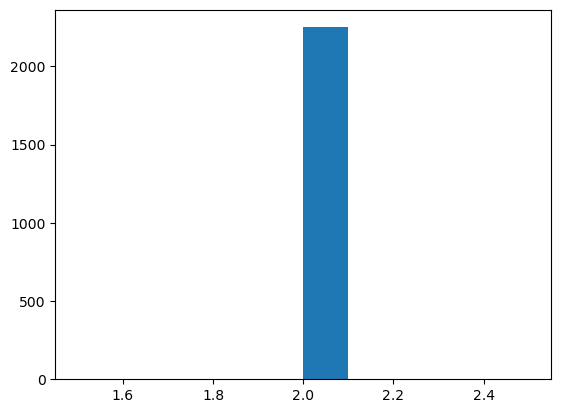

In [28]:
plt.hist(ak.num(leptons, axis=1))
print(quarks.fields)

print(semilep_partons.pdgId[0])
print(semilep_partons.genPartIdxMotherG[0])

print(semilep_partons[0].pt)
print(semilep_partons[0].eta)
print(semilep_partons[0].phi)
print()

print(semilep_partons.pdgId[1])
print(semilep_partons[1].pt)
print(semilep_partons[1].eta)
print(semilep_partons[1].phi)
print()

In [9]:
# check events where the MC is fully matched and the spanet works perfectly!
# EFT_tbarlnu
array = ak.from_parquet('/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/eft_validation/EFT_tbarlnu_withSPANET.parquet')
print(array.fields)
jets = ak.with_name(array['jets'], name="Momentum4D")
met = ak.with_name(array['met'], name="Momentum4D")
lepton_reco = ak.with_name(array['lepton_reco'], name="Momentum4D")
lepton_parton = ak.with_name(array['lepton_partons'], name="Momentum4D")
partons = ak.with_name(array['partons'], name="Momentum4D")

print(jets.px)
px_sum = ak.sum(jets.px, axis=1) + met.px + lepton_reco.px
print(px_sum)

py_sum = ak.sum(jets.py, axis=1) + met.py + lepton_reco.py
print(py_sum)

pz_sum = ak.sum(jets.pz, axis=1) + met.pz + lepton_parton[:,0].pz
print(pz_sum)



['partons_matched', 'partons', 'generator_info', 'lepton_partons', 'lepton_reco', 'met', 'weight', 'LHEReweightingWeight', 'prob_ak', 'jets']
[[132, -103, 12.3, -28.6], [181, ...], ..., [-112, 58.8, 22.4, 28.8, 1.67]]
[[-7.93], [141], [66.2], [13.7], ..., [-31.7], [-163], [0.203], [-46.4]]
[[33.5], [-44.7], [-16.2], [48.8], [-7.03], ..., [32], [-105], [3.95], [11.7]]
[-306, 816, 250, -308, 411, 160, -72.6, ..., 66.2, -589, 393, -419, -801, -4.43]
[[5, 5, 5, 5], [5, 0, 5, 5, 5], ..., [5, 5, ..., 0], [0, 5, 5, 0, 0, 0, 5, 5]]


In [6]:
x = vector.obj(px=0.0, py=0.0, pz=20.0, E=100.0)
print(x.eta)
print(x.phi)
print(x.pt)
#print(jets.prov[:10])
#print(jets.prov)

#prov1_jets = jets[jets.prov == 1]
#print(prov1_jets)

inf
0.0
0.0


In [18]:
# check events where the MC is fully matched and the spanet works perfectly!
# EFT_tbarqqBroken
array = ak.from_parquet('/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/eft_validation/EFT_tbarqqBroken_withSPANET.parquet')
print(array.fields)
jets = ak.with_name(array['jets'], name="Momentum4D")
met = ak.with_name(array['met'], name="Momentum4D")
lepton_reco = ak.with_name(array['lepton_reco'], name="Momentum4D")
lepton_parton = ak.with_name(array['lepton_partons'], name="Momentum4D")
partons = ak.with_name(array['partons'], name="Momentum4D")

print(jets.px)
px_sum = ak.sum(jets.px, axis=1) + met.px + lepton_reco.px
print(px_sum)

py_sum = ak.sum(jets.py, axis=1) + met.py + lepton_reco.py
print(py_sum)

pz_sum = ak.sum(jets.pz, axis=1) + met.pz + lepton_parton[:,0].pz
print(pz_sum)

print(jets.prov[:10])
print(jets.prov)

prov1_jets = jets[jets.prov == 1]
print(prov1_jets)

['partons_matched', 'partons', 'generator_info', 'lepton_partons', 'lepton_reco', 'met', 'weight', 'LHEReweightingWeight', 'prob_ak', 'jets']
[[55.5, -5.83, -22.9, 22.6], ..., [51, -66.6, 78.9, ..., -32.6, -11.3, 6.9]]
[[40.2], [22.4], [27], [-4.93], [23.8], ..., [70.8], [-15.8], [-123], [-55.7]]
[[15.2], [-19.9], [23.8], [32.6], [46.2], ..., [26.7], [-48.3], [65.4], [-55.2]]
[-158, -1.09e+03, 1.1e+03, -3.39, -281, -909, ..., 30.7, 249, -593, -640, 224]
[[5, 5, 5, 0], [0, 5, 5, 5, 5], [...], ..., [5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 0]]
[[5, 5, 5, 0], [0, 5, 5, 5, 5], ..., [5, ...], [4, 5, 5, 5, 5, 4, 4, 5, 5, 0]]
[[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], [], []]


In [24]:
print(ak.max(ak.num(jets.prov, axis=1)))
prov = ak.pad_none(jets.prov, 16, axis=1).to_numpy()
print(np.unique(prov))

16
[0 4 5 --]


In [7]:
array = ak.from_parquet('/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/eft_validation/EFT_tbarlnu_withSPANET.parquet')
print(array.fields)
jets = ak.with_name(array['jets'], name="Momentum4D")
partons = ak.with_name(array['partons'], name="Momentum4D")

print(partons.pdgId)
print(jets.fields)
print(jets.prov)

dim1 = ak.num(partons.pdgId, axis=1)
print(dim1)


['partons_matched', 'partons', 'generator_info', 'lepton_partons', 'lepton_reco', 'met', 'weight', 'LHEReweightingWeight', 'prob_ak', 'jets']
[[5, 2, -1, -5, 5, -5, -1], [5, 2, -1, ..., -5, 2], ..., [5, 2, -1, -5, 5, -5]]
['pt', 'eta', 'phi', 'prov', 'btag', 'm', 'dRMatchedJet', 'prov_Thad', 'prov_Tlep', 'prov_H']
[[5, 5, 5, 5], [5, 0, 5, 5, 5], [...], ..., [5, 5, 5, 4, 5, 0], [5, 5, 0, 0, 5]]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ..., 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6]


In [6]:
array = ak.from_parquet('/eos/user/a/adpetre/www/ttHbbAnalysis/training_dataset/v3_sig_forTrainingDataset/all_jets_fullRun2_ttHbb_forTraining_allyears_spanetprov_part1_train.parquet')
print(array.fields)
jets = ak.with_name(array['jets'], name="Momentum4D")
partons = ak.with_name(array['partons'], name="Momentum4D")

print(partons.pdgId)
print(jets.fields)
print(jets.prov)

['partons_matched', 'partons', 'generator_info', 'lepton_partons', 'lepton_reco', 'met', 'higgs', 'weight', 'prob_ak', 'jets']
[[21, 5, -5, 3, -4, 5, -5], [1, 5, ..., 5, -5], ..., [-1, 5, -5, -1, 2, 5, -5]]
['pt', 'eta', 'phi', 'btag', 'm', 'matched', 'prov', 'prov_Thad', 'prov_Tlep', 'prov_H']
[[4, 3, 2, 1, 5, 5, 1], [5, 1, 5, 1], ..., [3, 5, ..., 1, 5], [5, 2, 1, 3, 1]]


# check root files for eft samples for jet matching and partons order in madgraph

In [1]:
import ROOT

ModuleNotFoundError: No module named 'JupyROOT'